In [21]:
import xarray as xr
import cmocean 
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import cartopy
import cartopy.crs as ccrs
import cftime
import numpy as np

In [18]:
xr.set_options(display_style='html')
%matplotlib inline                           
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6

## Assessment of Geostrophic Balance
This dataset contains sea surface height, zonal velocity, and meridional velocity at daily resolution
- sea surface height (SSH, also called zos) gradient estimation (dh/dx, dh/dy --> convert lat/lon to distance) 
- SSH based geostrophic velocity estimation (solve geostrophic balance equation for u_g, v_g)
- calculation of difference between surface velocities (uo,vo) and surface geostrophic velocities (difference between u and u_g, v and v_g)
- question 1: look at differences if using a single time slice vs. a long time mean
- question 2: how sensitive are results to the length scale over which a gradient is calculated? 
- question 3: how sensitive are results to the timescale over which gradients and velocities are assessed? 

In [2]:
glorys_jan_mar_2021 = xr.open_zarr('../data/glorys_jan_mar_2021_daily_surface')

In [6]:
glorys_jan_mar_2021

<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 385, longitude: 950, time: 90)
Coordinates:
  * depth      (depth) float32 0.494025
  * latitude   (latitude) float32 19.25 19.333334 19.416666 ... 51.166668 51.25
  * longitude  (longitude) float32 -87.24999 -87.166664 ... -8.24999 -8.1666565
  * time       (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-03-31
Data variables:
    so         (time, depth, latitude, longitude) float32 dask.array<chunksize=(12, 1, 97, 238), meta=np.ndarray>
    thetao     (time, depth, latitude, longitude) float32 dask.array<chunksize=(12, 1, 97, 238), meta=np.ndarray>
    uo         (time, depth, latitude, longitude) float32 dask.array<chunksize=(12, 1, 97, 238), meta=np.ndarray>
    vo         (time, depth, latitude, longitude) float32 dask.array<chunksize=(12, 1, 97, 238), meta=np.ndarray>
    zos        (time, latitude, longitude) float32 dask.array<chunksize=(12, 97, 238), meta=np.ndarray>
Attributes:
    Conventions:       CF-1.11
    comment:           CMEMS product
    history:           2023/06/01 16:20:05 MERCATOR OCEAN Netcdf creation
    institution:       MERCATOR OCEAN
    references:        http://www.mercator-ocean.fr
    source:            MERCATOR GLORYS12V1
    subset:datasetId:  cmems_mod_glo_phy_my_0.083deg_P1D-m_202311
    subset:date:       2025-09-22T15:44:55.045Z
    subset:productId:  GLOBAL_MULTIYEAR_PHY_001_030
    subset:source:     ARCO data downloaded from the Marine Data Store using ...
    title:             daily mean fields from Global Ocean Physics Analysis a...

In [24]:
zos = glorys_jan_mar_2021.zos.isel(time=20).load()

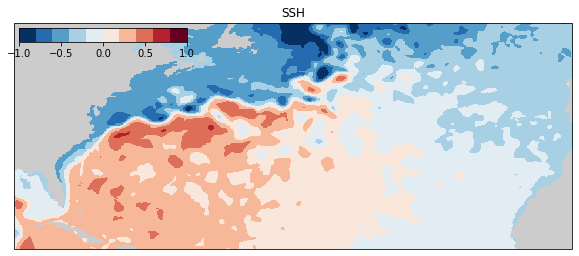

In [27]:
f, ax = plt.subplots(1,1,figsize=(10,8),subplot_kw={'projection':ccrs.PlateCarree()})
pp = ax.pcolor(zos.longitude, zos.latitude, zos, vmin=-1, vmax=1, \
          cmap=plt.get_cmap('RdBu_r',10),transform=ccrs.PlateCarree())
ax.set_facecolor('#cccccc')
ax.set_title('SSH')
axins1 = inset_axes(ax, width="30%",height="6%",loc="upper left")
ax.xaxis.set_ticks_position("top")
f.colorbar(pp, cax=axins1, orientation="horizontal")
ax.grid()

In [17]:
# sample surface velocities
ss_u = glorys_jan_mar_2021.isel(time=20).uo.isel(depth=0).load()
ss_v = glorys_jan_mar_2021.isel(time=20).vo.isel(depth=0).load()
speed = 0.5*(ss_u**2 + ss_v**2)

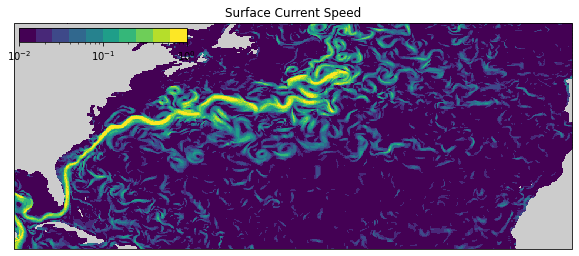

In [28]:
f, ax = plt.subplots(1,1,figsize=(10,8),subplot_kw={'projection':ccrs.PlateCarree()})
pp = ax.pcolor(ss_u.longitude, ss_u.latitude, speed, norm=LogNorm(vmin=0.01, vmax=1), \
          cmap=plt.get_cmap('viridis',10),transform=ccrs.PlateCarree())
ax.set_title('Surface Current Speed')
ax.set_facecolor('#cccccc')
axins1 = inset_axes(ax, width="30%",height="6%",loc="upper left")
ax.xaxis.set_ticks_position("top")
f.colorbar(pp, cax=axins1, orientation="horizontal")
ax.grid()